#                                                     SNEHA S         2213712080024
                         

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
from scipy.stats import kurtosis, skew

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
rt1 = pd.read_csv("C:/Users/sneha/OneDrive/Desktop/Sem 3/ML/Rotten Tomatoes Dataset/rotten_tomatoes_movies.csv")
rt1.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [102]:
movie = rt1['movie_title']
trating = rt1['tomatometer_rating']
tstatus = rt1['tomatometer_status']

In [103]:
rt = pd.concat([movie, trating, tstatus], axis=1, join='inner')
rt

,movie_title,tomatometer_rating,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,49.0,Rotten
1,Please Give,87.0,Certified-Fresh
2,10,67.0,Fresh
3,12 Angry Men (Twelve Angry Men),100.0,Certified-Fresh
4,"20,000 Leagues Under The Sea",89.0,Fresh
...,...,...,...
17707,Zoot Suit,56.0,Rotten
17708,Zootopia,98.0,Certified-Fresh
17709,Zorba the Greek,80.0,Fresh
17710,Zulu,96.0,Fresh


In [104]:
rt.dropna(inplace=True)
rt.isnull().sum()

movie_title           0
tomatometer_rating    0
tomatometer_status    0
dtype: int64

In [105]:
rt['tomatometer_status'].head()

0             Rotten
1    Certified-Fresh
2              Fresh
3    Certified-Fresh
4              Fresh
Name: tomatometer_status, dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
rt['tomatometer_status'] = labelencoder.fit_transform(rt['tomatometer_status'])

In [111]:
rt['tomatometer_status'].head()

0    2
1    0
2    1
3    0
4    1
Name: tomatometer_status, dtype: int32

In [112]:
tomstat =rt['tomatometer_status']
tomstat

0        2
1        0
2        1
3        0
4        1
        ..
17707    2
17708    0
17709    1
17710    1
17711    2
Name: tomatometer_status, Length: 17668, dtype: int32

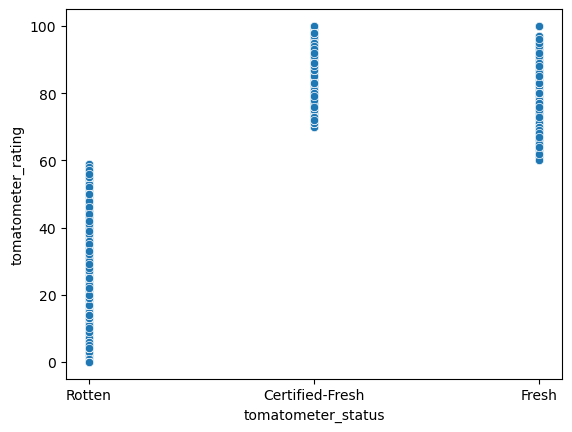

In [114]:
sns.scatterplot(x=tstatus, y= trating)
plt.show()

<Axes: >

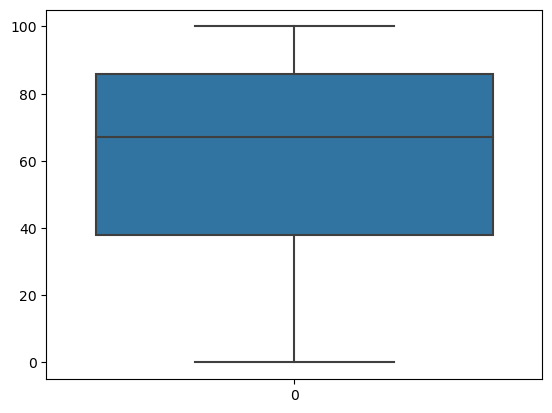

In [117]:
sns.boxplot(rt['tomatometer_rating'])

In [118]:
kurtosis(rt['tomatometer_rating'])

-0.9724194994574669

In [127]:
kurtosis(rt['tomatometer_status'])


-1.0958802609960896

<Axes: xlabel='tomatometer_rating', ylabel='Count'>

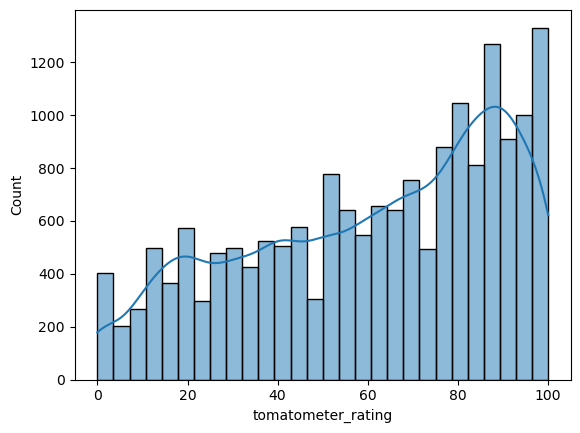

In [128]:
sns.histplot(data=rt['tomatometer_rating'], kde =True)

<Axes: xlabel='tomatometer_status', ylabel='Count'>

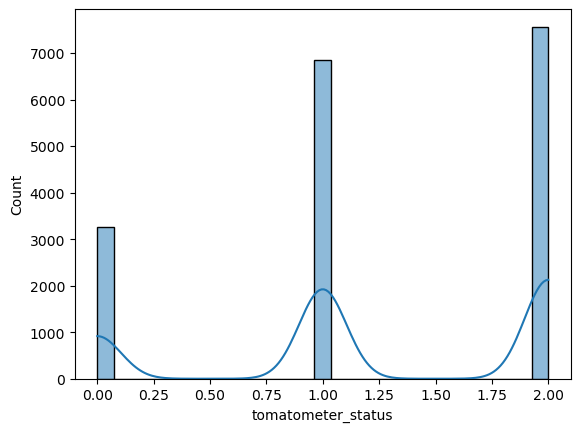

In [129]:
sns.histplot(data=rt['tomatometer_status'], kde =True)

In [119]:
tomratingdf=pd.DataFrame(rt['tomatometer_rating'])
tomstatusdf=pd.DataFrame(rt['tomatometer_status'])
tomratingdf.head()


,tomatometer_rating
0,49.0
1,87.0
2,67.0
3,100.0
4,89.0


In [120]:
tomstatusdf.head()

,tomatometer_status
0,2
1,0
2,1
3,0
4,1


In [121]:
model=LinearRegression()

In [122]:
model.fit(tomratingdf,tomstatusdf)

LinearRegression()

In [123]:
model.predict(pd.DataFrame([20])) 
# 0 -  Certified Fresh
# 1 - Fresh
# 2 - Rotten

C:\Users\sneha\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.10700358]])

In [124]:
model.score(tomratingdf,tomstatusdf)

0.6519493801980516

In [125]:
model.coef_

array([[-0.02111511]])

In [126]:
model.intercept_

array([2.5293057])